In [7]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os 
from dotenv import load_dotenv

%matplotlib inline

In [8]:
load_dotenv()

alpaca_api_key = os.getenv("Api_key")
alpaca_secret_key = os.getenv("Secret_key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


type(alpaca_api_key)


str

In [9]:
xle_df = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')

xlf_df = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')

xlb_df = api.alpha_vantage.historic_quotes('XLB', adjusted=True, output_format='pandas')

xlk_df = api.alpha_vantage.historic_quotes('XLK', adjusted=True, output_format='pandas')

In [10]:
health_df = api.alpha_vantage.historic_quotes('XLV', adjusted=True, output_format='pandas')

industrial_df = api.alpha_vantage.historic_quotes('XLI', adjusted=True, output_format='pandas')

utilities_df = api.alpha_vantage.historic_quotes('XLU', adjusted=True, output_format='pandas')

In [13]:
rwr_df = api.alpha_vantage.historic_quotes('RWR', adjusted=True, output_format='pandas')
rwr_df.head()

xly_df = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')
xly_df.head()


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-05-01,113.02,113.94,111.3700,112.24,112.24,6271588.0,0.0,1.0
2020-04-30,116.48,117.30,115.3988,116.60,116.60,5052476.0,0.0,1.0
2020-04-29,117.03,118.21,116.3800,117.33,117.33,4998795.0,0.0,1.0
2020-04-28,116.49,116.90,114.2200,114.80,114.80,4729438.0,0.0,1.0
2020-04-27,113.40,115.09,113.2900,114.35,114.35,4118447.0,0.0,1.0


In [14]:

xlp_df = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')
xlp_df.tail()

iyt_df = api.alpha_vantage.historic_quotes('IYT', adjusted=True, output_format='pandas')
iyt_df.tail()

# ive_df = api.alpha_vantage.historic_quotes('IVE', adjusted=True, output_format='pandas')
# spy_df = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2003-10-16,51.74,51.78,51.60,51.60,42.8023,700.0,0.0,1.0
2003-10-15,51.96,51.96,51.44,51.44,42.6696,700.0,0.0,1.0
2003-10-14,51.60,51.85,51.60,51.85,43.0097,7400.0,0.0,1.0
2003-10-13,51.70,51.70,51.57,51.57,42.7774,1100.0,0.0,1.0
2003-10-10,50.76,50.78,50.76,50.78,42.1221,700.0,0.0,1.0


In [15]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

xlb_df = xlb_df['5. adjusted close']
xlb_df.head()

xlk_df = xlk_df['5. adjusted close']
xlk_df.head()

rwr_df = rwr_df['5. adjusted close']
rwr_df.head()

xly_df = xly_df['5. adjusted close']
xly_df.head()

xlp_df = xlp_df['5. adjusted close']
xlp_df.head()

xle_df = xle_df['5. adjusted close']
xle_df.head()

xlf_df = xlf_df['5. adjusted close']
xlf_df.head()

health_df = health_df['5. adjusted close']
health_df.head()

industrial_df = industrial_df['5. adjusted close']
industrial_df.head()

utilities_df = utilities_df['5. adjusted close']
utilities_df.head()

iyt_df = iyt_df['5. adjusted close']
iyt_df.head()


#Use concat to put the data in one dataframe
concat_df = pd.concat([xlb_df, xlk_df, rwr_df, xly_df, xlp_df, xle_df, xlf_df, health_df, industrial_df, utilities_df, iyt_df], 
                      axis = "columns", join = "inner")
concat_df.head()


,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,,,,,,,,
2020-05-01,50.79,88.90,75.11,112.24,57.62,35.85,22.06,97.83,62.27,55.88,144.775
2020-04-30,51.88,91.41,77.87,116.60,58.26,38.00,22.79,99.73,64.21,57.26,149.920
2020-04-29,53.47,91.82,79.10,117.33,58.96,38.86,23.38,100.19,65.51,58.61,154.400
2020-04-28,52.14,88.20,77.38,114.80,59.21,36.18,22.72,99.53,64.28,59.15,150.270
2020-04-27,51.19,89.39,76.08,114.35,58.88,35.37,22.48,101.58,63.10,58.93,148.900


In [16]:
#Change column names to avoid confusion
columns = ['Materials close',
          'Tech close',
          'RE close',
          'Discretionary close',
          'Staples close',
          'Energy close',
          'Fin close',
          'HealthCare close',
          'Industrials close',
          'Utilities close',
          'Transports close']
concat_df.columns = columns
concat_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close
date,,,,,,,,,,,
2020-05-01,50.79,88.90,75.11,112.24,57.62,35.85,22.06,97.83,62.27,55.88,144.775
2020-04-30,51.88,91.41,77.87,116.60,58.26,38.00,22.79,99.73,64.21,57.26,149.920
2020-04-29,53.47,91.82,79.10,117.33,58.96,38.86,23.38,100.19,65.51,58.61,154.400
2020-04-28,52.14,88.20,77.38,114.80,59.21,36.18,22.72,99.53,64.28,59.15,150.270
2020-04-27,51.19,89.39,76.08,114.35,58.88,35.37,22.48,101.58,63.10,58.93,148.900


In [17]:
#Sort earliest to latest so that .pct_change() function works right.

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close
date,,,,,,,,,,,
2003-10-10,15.6663,15.2225,24.9652,23.4176,13.9255,16.9139,15.2858,21.2388,17.2546,12.1628,42.1221
2003-10-13,15.8310,15.2692,25.0908,23.6569,13.9785,16.9818,15.5271,21.2993,17.3261,12.2403,42.7774
2003-10-14,15.9340,15.2303,25.1083,23.7845,14.0515,16.9139,15.6190,21.3296,17.4118,12.2735,43.0097
2003-10-15,15.9203,15.3238,25.0088,23.6888,14.0316,16.6694,15.5788,21.2842,17.4404,12.1186,42.6696
2003-10-16,15.9752,15.3783,25.1222,23.7925,14.0515,16.8460,15.5960,21.3977,17.4476,12.1739,42.8023


In [18]:
returns_df = concat_df.pct_change()
returns_df

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close
date,,,,,,,,,,,
2003-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,0.026675,0.008575,0.038635,0.018708,0.002896,0.021664,0.034039,0.012863,0.024850,0.010460,0.028528
2020-04-28,0.018558,-0.013312,0.017087,0.003935,0.005605,0.022901,0.010676,-0.020181,0.018700,0.003733,0.009201
2020-04-29,0.025508,0.041043,0.022228,0.022038,-0.004222,0.074074,0.029049,0.006631,0.019135,-0.009129,0.027484


In [19]:
# Drop nulls
returns_df.dropna(inplace=True)

#count nulls again
returns_df.isnull().sum()

Materials close        0
Tech close             0
RE close               0
Discretionary close    0
Staples close          0
Energy close           0
Fin close              0
HealthCare close       0
Industrials close      0
Utilities close        0
Transports close       0
dtype: int64

In [20]:
# Checking for duplicate rows
returns_df.duplicated()

date
2003-10-13    False
2003-10-14    False
2003-10-15    False
2003-10-16    False
2003-10-17    False
              ...  
2020-04-27    False
2020-04-28    False
2020-04-29    False
2020-04-30    False
2020-05-01    False
Length: 4167, dtype: bool

In [21]:
# drop duplicates
returns_df.drop_duplicates(inplace=True)
returns_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close
date,,,,,,,,,,,
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110
2003-10-17,-0.009452,-0.016211,-0.007846,-0.014080,-0.006135,-0.006856,-0.008836,-0.011319,-0.006964,-0.006366,-0.004458


In [22]:
# rename columns to create dataframe for daily returns
returns_df.rename(columns={'Materials close': 'Materials return',
                          'Tech close': 'Tech return',
                          'RE close': 'RE return',
                          'Discretionary close': 'Discretionary return',
                          'Staples close': 'Staples return',
                          'Energy close': 'Energy return',
                          'Fin close': 'Fin return',
                          'HealthCare close': 'HealthCare return',
                          'Industrials close': 'Industrials return',
                          'Utilities close': 'Utilities return',
                          'Transports close': 'Transports return'},
                  inplace=True)
returns_df.head()

,Materials return,Tech return,RE return,Discretionary return,Staples return,Energy return,Fin return,HealthCare return,Industrials return,Utilities return,Transports return
date,,,,,,,,,,,
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110
2003-10-17,-0.009452,-0.016211,-0.007846,-0.014080,-0.006135,-0.006856,-0.008836,-0.011319,-0.006964,-0.006366,-0.004458


In [24]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_materials = (1 + returns_df['Materials return']).cumprod()
cumulative_returns_tech = (1 + returns_df['Tech return']).cumprod()
cumulative_returns_RE = (1 + returns_df['RE return']).cumprod()
cumulative_returns_Discretionary = (1 + returns_df['Discretionary return']).cumprod()
cumulative_returns_Staples = (1 + returns_df['Staples return']).cumprod()
cumulative_returns_Energy = (1 + returns_df['Energy return']).cumprod()
cumulative_returns_Fin = (1 + returns_df['Fin return']).cumprod()
cumulative_returns_HealthCare = (1 + returns_df['HealthCare return']).cumprod()
cumulative_returns_Industrials = (1 + returns_df['Industrials return']).cumprod()
cumulative_returns_Utilities = (1 + returns_df['Utilities return']).cumprod()
cumulative_returns_Transports = (1 + returns_df['Transports return']).cumprod()

In [25]:
cumulative_returns_materials

date
2003-10-13    1.010513
2003-10-14    1.017088
2003-10-15    1.016213
2003-10-16    1.019717
2003-10-17    1.010079
                ...   
2020-04-27    3.267523
2020-04-28    3.328163
2020-04-29    3.413059
2020-04-30    3.311567
2020-05-01    3.241991
Name: Materials return, Length: 4167, dtype: float64

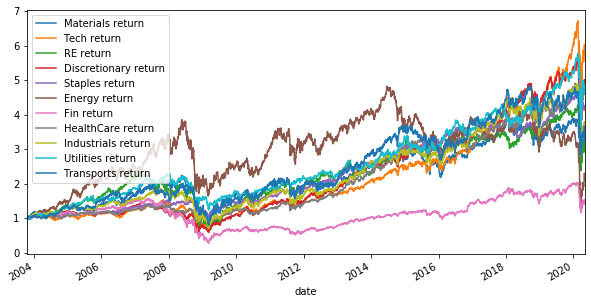

In [26]:
#plot cumulative returns

cumulative_returns_materials.plot(figsize=(10,5), legend=True)
cumulative_returns_tech.plot(figsize=(10,5), legend=True)
cumulative_returns_RE.plot(figsize=(10,5), legend=True)
cumulative_returns_Discretionary.plot(figsize=(10,5), legend=True)
cumulative_returns_Staples.plot(figsize=(10,5), legend=True)
cumulative_returns_Energy.plot(figsize=(10,5), legend=True)
cumulative_returns_Fin.plot(figsize=(10,5), legend=True)
cumulative_returns_HealthCare.plot(figsize=(10,5), legend=True)
cumulative_returns_Industrials.plot(figsize=(10,5), legend=True)
cumulative_returns_Utilities.plot(figsize=(10,5), legend=True)
cumulative_returns_Transports.plot(figsize=(10,5), legend=True)